In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('./Data/dfForModel.csv')
df = pd.get_dummies(df)

# Linear Regression

In [34]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df['interaction2'] = df['GDPPerCapitaSquared(thousands)']*df['developed']

X = df.drop('PerCapitaCO2Emissions', axis=1)
X = sm.add_constant(X)
y = df.PerCapitaCO2Emissions

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     PerCapitaCO2Emissions   R-squared:                       0.522
Model:                               OLS   Adj. R-squared:                  0.522
Method:                    Least Squares   F-statistic:                     3715.
Date:                   Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                           14:08:21   Log-Likelihood:                -39735.
No. Observations:                  13603   AIC:                         7.948e+04
Df Residuals:                      13598   BIC:                         7.952e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

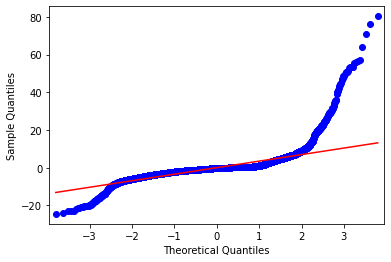

In [35]:
qqfig = sm.qqplot(results.resid, line='r')

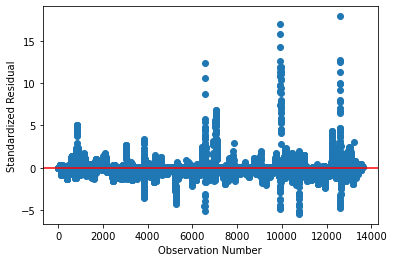

In [37]:
stdres = pd.DataFrame(results.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number');

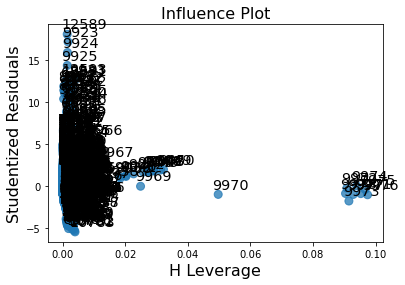

In [38]:
levfig = sm.graphics.influence_plot(results, size=8)


In [76]:
df2

,GDPPerCapita(thousands),GDPPerCapitaSquared(thousands),developed,developed_interaction_gdpPerCapita,logCO2
0,1.15600,1.336336,0,0.0,-4.521656
1,1.17000,1.368900,0,0.0,-4.449563
2,1.18900,1.413721,0,0.0,-4.461733
3,1.24000,1.537600,0,0.0,-4.326333
4,1.24500,1.550025,0,0.0,-4.340045
...,...,...,...,...,...
13598,1.59400,2.540836,0,0.0,-0.126492
13599,1.56000,2.433600,0,0.0,-0.126743
13600,1.53400,2.353156,0,0.0,-0.260286
13601,1.58237,2.503895,0,0.0,-0.328875


In [87]:
df2 = df
df2['logCO2'] = np.log(df2['PerCapitaCO2Emissions'])
df2 = df2.drop('PerCapitaCO2Emissions',axis=1)

df2 = df2.replace([np.inf, -np.inf], 0)

df2.describe()

X = df2.drop('logCO2', axis=1)
X = sm.add_constant(X)
y = df2.logCO2

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 logCO2   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     4072.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:41:25   Log-Likelihood:                -22611.
No. Observations:               13603   AIC:                         4.523e+04
Df Residuals:                   13598   BIC:                         4.527e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

C:\Users\tomas\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


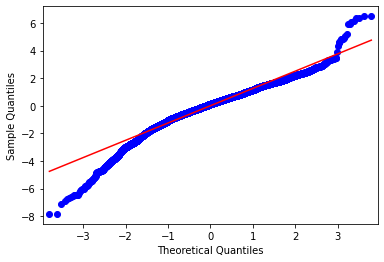

In [81]:
qqfig = sm.qqplot(results.resid, line='r')

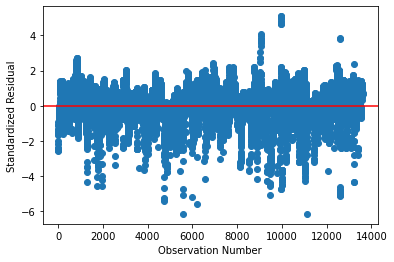

In [82]:
stdres = pd.DataFrame(results.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number');

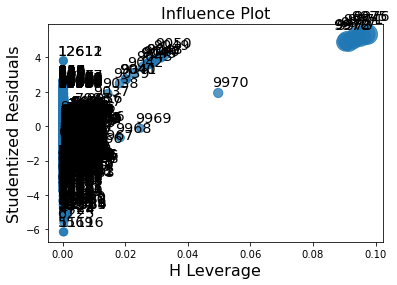

In [83]:
levfig = sm.graphics.influence_plot(results, size=20)
